In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

from sklearn import preprocessing,model_selection

Read CSV file from drive

In [ ]:
df = pd.read_csv('Business_case_dataset.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,873,2160.0,2160,10.13,10.13,0,8.91,0.00,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.00,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.00,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.00,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.00,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14079,27398,2160.0,2160,7.99,7.99,0,8.91,0.00,0.0,0,54,0
14080,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,0.0,0,4,0
14081,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,0.0,0,29,0
14082,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0


Trim the dataset into equal cases of ones and zeros
Shuffle

In [ ]:
df[11].value_counts()

0    11847
1     2237
Name: 11, dtype: int64

In [ ]:
ones = df[df[df.columns[-1]]==1]
zeros = df[df[df.columns[-1]]==0][:ones.shape[0]]

df = pd.concat([ones,zeros])


df = df.sample(frac = 1)
df

,0,1,2,3,4,5,6,7,8,9,10,11
2461,575,1620.0,1620,5.33,5.33,0,8.91,0.00,0.0,0,0,0
3651,18835,1620.0,1620,6.00,6.00,0,8.91,0.38,561.6,0,31,0
3571,21304,2160.0,2160,5.33,5.33,0,8.91,0.37,567.0,0,33,0
1560,9812,1188.0,1188,5.57,5.57,0,8.91,0.00,0.0,0,0,1
3248,2895,1620.0,1620,5.90,5.90,0,8.91,0.00,680.4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1666,12309,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,1
2085,28932,1404.0,2808,5.33,10.67,1,9.50,0.00,0.0,2,26,1
3034,8262,1188.0,1188,5.87,5.87,0,8.91,0.00,734.4,0,0,0
2582,135,1188.0,1188,7.99,7.99,0,8.91,0.06,0.0,0,7,0


Select input columns based on correlation
 and split into input and target

In [ ]:
df.corr()[11]

0    -0.010613
1    -0.064779
2     0.257012
3     0.015352
4     0.195741
5     0.011848
6     0.012738
7    -0.226386
8    -0.010555
9     0.030410
10    0.102138
11    1.000000
Name: 11, dtype: float64

In [ ]:
corr_mat = df.corr()[11][:-1]
relevant_cols = corr_mat[abs(corr_mat)>0.05].index

input_df = df[relevant_cols]

In [ ]:
input_df

,0,1,2,4,7,8,10
3842,19506,1620.0,1620,5.33,0.39,518.40,49
1741,6276,1656.0,4968,16.00,0.00,0.00,12
2574,353,2160.0,2160,5.33,0.10,0.00,6
3463,10060,1620.0,1620,7.99,0.01,680.40,122
948,24703,1188.0,1188,5.33,0.00,0.00,273
...,...,...,...,...,...,...,...
2374,94,1188.0,1188,9.49,0.84,0.00,2
578,19634,2160.0,2160,8.00,0.00,64.80,136
2460,418,1620.0,1620,5.77,0.00,0.00,0
2964,25237,1620.0,1620,5.33,0.02,736.56,0


In [ ]:
input_df = df[df.columns[:-1]]

In [ ]:
target_df = df[df.columns[-1]]

Now identify columns which might have outliers

In [ ]:
input_df.describe()

,0,1,2,4,7,8,10
count,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000
mean,15092.879079,1568.267156,1843.169423,8.445823,0.074473,337.990031,72.560125
std,9770.143643,497.491877,870.538565,6.333357,0.198747,391.459893,93.950475
min,2.000000,216.000000,216.000000,3.860000,0.000000,0.000000,0.000000
25%,7599.250000,1188.000000,1188.000000,5.330000,0.000000,0.000000,0.000000
50%,14616.500000,1620.000000,1620.000000,6.580000,0.000000,190.080000,21.000000
75%,22013.000000,2160.000000,2160.000000,8.610000,0.000000,623.160000,135.000000
max,33623.000000,2160.000000,7020.000000,111.470000,1.000000,2116.800000,464.000000


In [ ]:
outliers_max = input_df.columns[(input_df.quantile(0.9)<input_df.max()-input_df.std())]
outliers_min = input_df.columns[(input_df.quantile(0.1)>input_df.min()+input_df.std())]

In [ ]:
def replace_outliers_max(column):
    cutoff = column.quantile(0.9)
    column[column > cutoff] = cutoff
    return column

def replace_outliers_min(column):
    cutoff = column.quantile(0.1)
    column[column < cutoff] = cutoff
    return column

In [ ]:
input_df[outliers_max] = input_df[outliers_max].apply(replace_outliers_max,axis=0)
input_df[outliers_min] = input_df[outliers_min].apply(replace_outliers_min,axis=0)
input_df.describe()

<ipython-input-8-7ac4b8a8bea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[outliers_max] = input_df[outliers_max].apply(replace_outliers_max,axis=0)
<ipython-input-8-7ac4b8a8bea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[outliers_min] = input_df[outliers_min].apply(replace_outliers_min,axis=0)


,0,1,2,4,7,8,10
count,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000
mean,15092.879079,1617.008315,1741.711220,7.601629,0.042293,301.895968,67.628297
std,9770.143643,412.421976,615.676495,2.668366,0.091500,306.583798,83.104562
min,2.000000,1080.000000,216.000000,3.860000,0.000000,0.000000,0.000000
25%,7599.250000,1188.000000,1188.000000,5.330000,0.000000,0.000000,0.000000
50%,14616.500000,1620.000000,1620.000000,6.580000,0.000000,190.080000,21.000000
75%,22013.000000,2160.000000,2160.000000,8.610000,0.000000,623.160000,135.000000
max,33623.000000,2160.000000,2808.000000,13.330000,0.280000,736.560000,226.000000


Scale the input_df

In [ ]:
scaled_inputs_df = preprocessing.scale(input_df)
scaled_inputs_df

array([[-1.48610935,  0.00725475, -0.19770907, ..., -0.46227052,
        -0.98481953, -0.81386454],
       [ 0.38305877,  0.00725475, -0.19770907, ...,  2.59816459,
         0.84718456, -0.4407988 ],
       [ 0.63579569,  1.31673967,  0.67947297, ...,  2.59816459,
         0.86479999, -0.41673004],
       ...,
       [-0.69923666, -1.04033318, -0.89945469, ..., -0.46227052,
         1.41087813, -0.81386454],
       [-1.53114955, -1.04033318, -0.89945469, ...,  0.193537  ,
        -0.98481953, -0.72962389],
       [ 1.49708706, -1.30223017, -1.0748911 , ..., -0.46227052,
         1.4179243 , -0.81386454]])

Split data into train, validate and test datasets:


*   input_train
*   input_val
*   input_test
*   target_train
*   target_val
*   target_test

In [ ]:
input_train_val, input_test, target_train_val, target_test = model_selection.train_test_split(input_df,target_df, test_size=0.1, train_size=0.9)
input_train, input_val, target_train, target_val = model_selection.train_test_split(input_df,target_df, test_size=0.2, train_size=0.8)

Design the model

In [ ]:
def design_model(hidden_layer_size1,hidden_layer_size2,optimizer,patience,batch_size,max_epochs, hidden_layer_size3=None, dropout_size=None):
  input_size = 11
  output_size = 2

  # hyperparameter
  hidden_layer_size1 = hidden_layer_size1
  hidden_layer_size2 = hidden_layer_size2


  if hidden_layer_size3!=None and dropout_size!=None:
   model = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_layer_size1, activation='relu',name='HiddenLayer1'), # 1st hidden layer
      tf.keras.layers.Dropout(dropout_size),
      tf.keras.layers.Dense(hidden_layer_size2, activation='relu',name='HiddenLayer2'), # 2nd hidden layer
      tf.keras.layers.Dense(hidden_layer_size3, activation='relu',name='HiddenLayer3'), # 3rd hidden layer
      tf.keras.layers.Dense(output_size, activation='softmax',name='OutputLayer') # output layer
    ])
  elif dropout_size!=None:
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_layer_size1, activation='relu',name='HiddenLayer1'), # 1st hidden layer
      tf.keras.layers.Dropout(dropout_size),
      tf.keras.layers.Dense(hidden_layer_size2, activation='relu',name='HiddenLayer2'), # 2nd hidden layer
      tf.keras.layers.Dense(output_size, activation='softmax',name='OutputLayer') # output layer
    ])
  elif hidden_layer_size3!=None:
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_layer_size1, activation='relu',name='HiddenLayer1'), # 1st hidden layer
      tf.keras.layers.Dense(hidden_layer_size2, activation='relu',name='HiddenLayer2'), # 2nd hidden layer
      tf.keras.layers.Dense(hidden_layer_size3, activation='relu',name='HiddenLayer3'), # 3rd hidden layer
      tf.keras.layers.Dense(output_size, activation='softmax',name='OutputLayer') # output layer
    ])
  else:
   model = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_layer_size1, activation='relu',name='HiddenLayer1'), # 1st hidden layer
      tf.keras.layers.Dense(hidden_layer_size2, activation='relu',name='HiddenLayer2'), # 2nd hidden layer
      tf.keras.layers.Dense(output_size, activation='softmax',name='OutputLayer') # output layer
    ])


  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # hyperparameter
  batch_size = batch_size
  max_epochs = max_epochs
  early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience)
  history = model.fit(input_train, target_train, batch_size=batch_size, epochs=max_epochs,
            callbacks=[early_stopping],
            validation_data=(input_val, target_val),
            verbose = 2
            )


  return model,history

In [ ]:
#Attempt 5

model,history = design_model(hidden_layer_size1=50,hidden_layer_size2=50,optimizer='adam',patience=2,batch_size=100,max_epochs=100)
model.evaluate(input_test, target_test)

In [ ]:
#Attempt 6

model,history = design_model(hidden_layer_size1=32,hidden_layer_size2=24,optimizer='adam',patience=5,batch_size=100,max_epochs=100)
model.evaluate(input_test, target_test)

In [ ]:
#Attempt 7

model,history = design_model(hidden_layer_size1=32,hidden_layer_size2=24,optimizer='adam',patience=5,batch_size=100,max_epochs=100, dropout_size=0.2)
model.evaluate(input_test, target_test)

In [ ]:
#Attempt 8

model,history = design_model(hidden_layer_size1=32,hidden_layer_size2=24,optimizer='adam',patience=5,batch_size=100,max_epochs=100, dropout_size=0.2, hidden_layer_size3=12)
model.evaluate(input_test, target_test)

In [ ]:
#Attempt 9

model,history = design_model(hidden_layer_size1=32,hidden_layer_size2=24,optimizer='adam',patience=5,batch_size=75,max_epochs=50, dropout_size=0.2, hidden_layer_size3=12)
model.evaluate(input_test, target_test)

Epoch 1/50
48/48 - 1s - loss: 399.3168 - accuracy: 0.5205 - val_loss: 39.5353 - val_accuracy: 0.5676 - 1s/epoch - 31ms/step
Epoch 2/50
48/48 - 0s - loss: 136.2052 - accuracy: 0.5700 - val_loss: 87.2070 - val_accuracy: 0.5140 - 135ms/epoch - 3ms/step
Epoch 3/50
48/48 - 0s - loss: 82.5290 - accuracy: 0.5773 - val_loss: 4.9856 - val_accuracy: 0.8291 - 149ms/epoch - 3ms/step
Epoch 4/50
48/48 - 0s - loss: 56.1795 - accuracy: 0.6130 - val_loss: 5.9670 - val_accuracy: 0.8067 - 126ms/epoch - 3ms/step
Epoch 5/50
48/48 - 0s - loss: 49.9520 - accuracy: 0.6080 - val_loss: 12.1707 - val_accuracy: 0.6726 - 135ms/epoch - 3ms/step
Epoch 6/50
48/48 - 0s - loss: 35.1650 - accuracy: 0.6398 - val_loss: 8.8082 - val_accuracy: 0.6939 - 122ms/epoch - 3ms/step
Epoch 7/50
48/48 - 0s - loss: 26.1340 - accuracy: 0.6901 - val_loss: 3.5553 - val_accuracy: 0.8994 - 123ms/epoch - 3ms/step
Epoch 8/50
48/48 - 0s - loss: 17.9336 - accuracy: 0.7365 - val_loss: 3.6181 - val_accuracy: 0.8961 - 133ms/epoch - 3ms/step
Epoch

[1.0490046739578247, 0.9263392686843872]

In [ ]:
#Attempt 10

model,history= design_model(hidden_layer_size1=32,hidden_layer_size2=24,optimizer='adam',patience=5,batch_size=50,max_epochs=50, dropout_size=0.2, hidden_layer_size3=12)
model.evaluate(input_test, target_test)

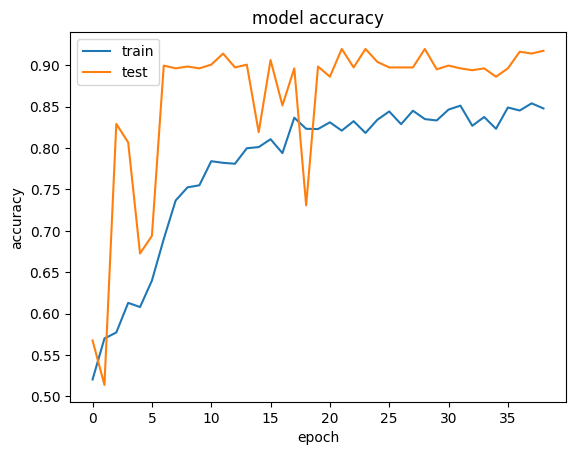

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

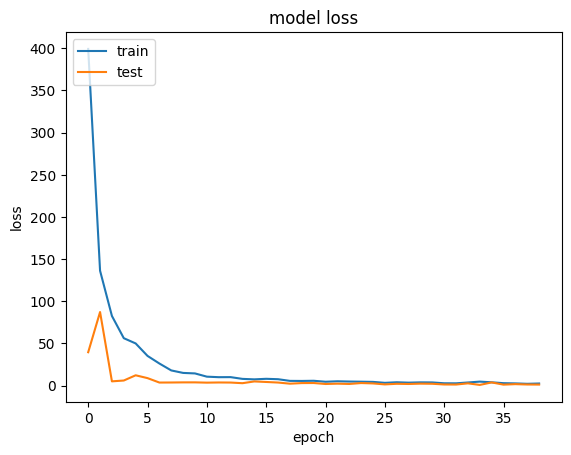

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

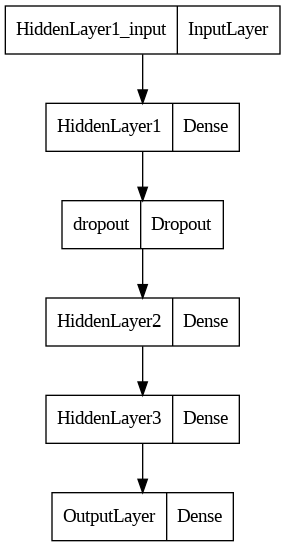

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 32)                256       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 HiddenLayer2 (Dense)        (None, 24)                792       
                                                                 
 HiddenLayer3 (Dense)        (None, 12)                300       
                                                                 
 OutputLayer (Dense)         (None, 2)                 26        
                                                                 
Total params: 1374 (5.37 KB)
Trainable params: 1374 (5.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
